In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


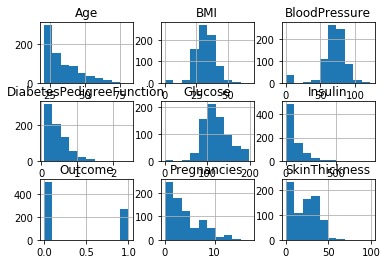

In [5]:
df.hist()
plt.show()

In [6]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [8]:
train_mean_pos = X_train[y_train == 1].mean()
train_std_pos = X_train[y_train == 1].std()
train_mean_neg = X_train[y_train == 0].mean()
train_std_neg = X_train[y_train == 0].std()

In [9]:
summary = {"train_mean_pos":train_mean_pos.tolist(),
            "train_mean_neg":train_mean_neg.tolist(),
             "train_std_pos":train_std_pos.tolist(),
              "train_std_neg":train_std_neg.tolist()
          }

In [10]:
summary

{'train_mean_pos': [5.093922651933702,
  140.1767955801105,
  69.83977900552486,
  22.662983425414364,
  103.99447513812154,
  35.22486187845305,
  0.5659226519337018,
  37.3756906077348],
 'train_mean_neg': [3.466292134831461,
  111.26966292134831,
  68.41292134831461,
  20.230337078651687,
  71.1685393258427,
  30.54073033707867,
  0.4261910112359552,
  31.27247191011236],
 'train_std_pos': [3.74121438611488,
  30.889798976130592,
  23.088038460442895,
  17.59362921137937,
  139.29889914367465,
  7.815823736194471,
  0.3718188994443925,
  10.928671017779598],
 'train_std_neg': [3.0611585331571844,
  26.31221600078514,
  17.683150296240495,
  15.052500831905267,
  106.94605574037705,
  7.598761835781948,
  0.29999393895866006,
  11.468090478565333]}

In [11]:
def cond_prob(x, mean, std):
    variance = std*std
    p = 1/(np.sqrt(2*np.pi*variance)) * np.exp((-(x-mean)**2) / (2*variance))
    return p

In [12]:
def posterior_prob(row, summary):
    pos_prob = len(X_train[y_train == 1]) / (len(X_train))
    neg_prob = len(X_train[y_train == 0]) / (len(X_train))
    
    for i in range(0, len(row)):
        pos_prob = pos_prob * cond_prob(row[i], train_mean_pos[i], train_std_pos[i])
    for i in range(0, len(row)):
        neg_prob = neg_prob * cond_prob(row[i], train_mean_neg[i], train_std_neg[i])
    return [pos_prob, neg_prob]

In [13]:
predicted_raw = []
for row in X_test.values.tolist():
    predicted_raw.append(posterior_prob(row, summary))

In [14]:
predicted_raw

[[1.7546866073783455e-14, 6.727991281216123e-14],
 [9.660762364620048e-15, 8.548731568341244e-14],
 [9.612965405736209e-16, 2.6106594103339117e-17],
 [7.625158353382548e-15, 4.5340073341679253e-13],
 [4.402965626414157e-13, 4.050672426441665e-13],
 [3.6269544623841566e-13, 7.447941266185071e-13],
 [1.604444362617867e-14, 1.1791607991323813e-12],
 [2.4848202506861545e-14, 2.2153869935374335e-13],
 [6.086665250938289e-14, 5.741435334939896e-15],
 [1.5919544831067746e-13, 2.626465600640753e-12],
 [4.0738962970593754e-14, 9.97080175478603e-15],
 [2.615809062240159e-13, 1.4186970667693127e-12],
 [5.5613012698639473e-14, 1.5039148888766695e-12],
 [1.7594887066408985e-14, 2.40754519834222e-16],
 [8.751446884174436e-15, 1.0384956370679962e-12],
 [3.569846045721946e-14, 5.084410565036611e-13],
 [9.984142023234806e-15, 7.820500113443476e-16],
 [1.3943993915333909e-14, 1.6697058584874863e-13],
 [7.056182550444984e-14, 4.981221366227997e-13],
 [8.319530177620254e-14, 4.216573645267338e-14],
 [3.96

In [15]:
predictions = []
for row in predicted_raw:
    if(row[0] > row[1]):
        predictions.append(1)
    else:
        predictions.append(0)

In [18]:
confusion_matrix(predictions, y_test)

array([[128,  39],
       [ 16,  48]])

In [20]:
accuracy_score(predictions, y_test)

0.7619047619047619